In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path


In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [5]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians


In [6]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

In [137]:
#X, y = generate_gaussians_distributions()
X, y = generate_elipse_data()

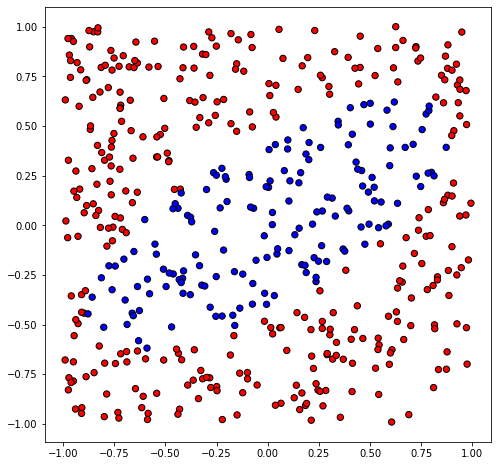

In [131]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [139]:
scoreResult = []
for i  in range(100001,100020):
    model = LogisticRegression(solver='lbfgs', C=i)
    model.fit(X, y)
    score = model.score(X,y)
    scoreResult.append(score)

print(scoreResult)

[0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682, 0.682]


In [132]:
model = LogisticRegression(solver='lbfgs', C=100001)
# con  fit_intercept=False baja el accuracy con la distribucion que es linealmente separable. gaussian distro
# con  fit_intercept=False baja el accuracy con el dataset generate elipse data
# C=10 / 0.996 / gaussians_distributions
# C=100 / 0.996 / gaussians_distributions
# C=100 / 0.998 /gaussians_distributions
# C=1000 / 1 / gaussians_distributions
# C=1000 / 0.682 / generate_elipse_data()
# C=10000 / 0.682 / generate_elipse_data()
# C=1000000/ 0.682 / generate_elipse_data()

In [133]:
model.fit(X, y)

LogisticRegression(C=100001)

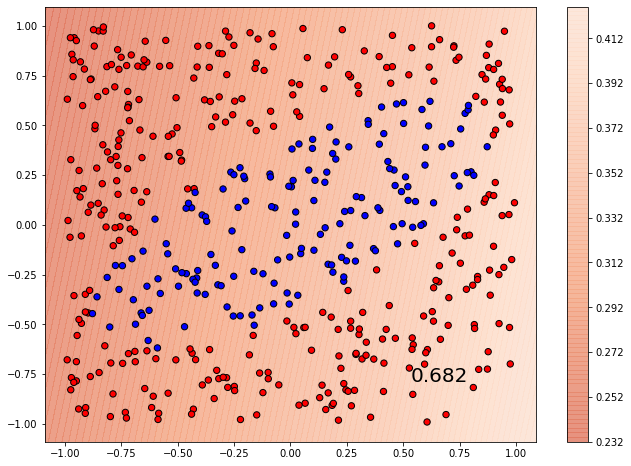

In [134]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [81]:
#  Problema 3.1
# Usar el método predict_proba para calcular la probablidad de una observación para el dataset generate_elipse_data().
# Tener en cuenta que este método espera una array de dimención (N, 2), donde 2 es la dimensión de las observaciones y N es la cantidad de observaciones cuya probabilidad quiero obtener.
# Si quiero obtener la probabilidad de una sola observación tendré que pasarle un numpy array de tamaño (2,1).
#  X1 = rojo
#  X2 = azul
x1temp = 0.5
x2temp = -0.75
Xtemp = np.array([x1temp, x2temp] ).reshape(1, 2)
model.predict_proba(Xtemp)

array([[0.33883316, 0.66116684]])

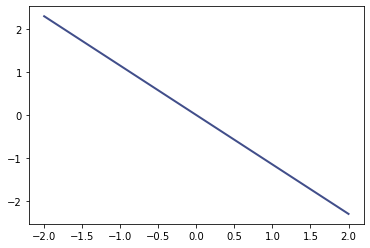

In [87]:
# Problema 3.3
x1 = np.linspace(-2, 2, 100)
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x1, x2, color='#414e8a', linewidth=2)

In [83]:
# print(y)
# print(model.predict_proba(X))

In [85]:
# Problema 3.3
# https://www.wolframalpha.com/input/?i=graph+the+linear+function+f%28x%29+%3D+-0.3336x1+-+0.0607X2+-+0.7469
print("pendiente: ", model.coef_[0][1])
print("pendiente2: ", model.coef_[0][0])
print("pendiente3: ", model.intercept_[0])
print(x1)
print(x2)
print(model.coef_, model.intercept_)

pendiente:  -3.7995107066006844
pendiente2:  -4.362269271893046
pendiente3:  0.0
[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030

In [86]:
# Problema 3.4
from sklearn.metrics import log_loss
log_loss(y, model.predict_proba(X))

0.1637448560716208

In [22]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [46]:
# Problema 4
# Esta función calcula el promedio de las entropías cruzadas entre los valores verdaderos (y) y la estimación de las probabilidades de cada observación (Xi).
# Regresion Polinomial
# Completar la función
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X, (X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X, (X[:,0]*X[:,1]).reshape(-1, 1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X,(X[:,1]**2).reshape(-1, 1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

In [62]:
print(add_columns(X).shape)
Xprima = add_columns(X)

(500, 6)


In [71]:
#print(Xprima)
#print(X)

modelprima = LogisticRegression(solver='lbfgs', fit_intercept=False)
modelprima.fit(Xprima, y)
score = modelprima.score(Xprima,y)
print(score)
print(model.coef_, model.intercept_)
plt.figure(figsize=(11,8))
#plot_boundaries(Xprima,y, score, probability_func=modelprima.predict_proba, mesh_res=500)



0.928
[[-2.37389188e-06  1.55193781e-01  2.41973481e-01 -3.95098195e+00
   4.09686730e+00 -6.58583970e+00]] [1.85669718]


<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>